In [166]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()

In [167]:
import numpy as np
import h5py
from chainconsumer import ChainConsumer
from glob import glob
from os import path
from copy import deepcopy
from collections import OrderedDict
from os.path import basename

In [168]:
! ls -ltr ~/des/PearceMCMC/VpeakSHAM_*rmin_*.hdf5

-rw-r--r-- 1 swmclau2 des  690884158 Jun  8 23:29 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_2.0_HOD.hdf5
-rw-r--r-- 1 swmclau2 des  617967095 Jun  9 04:00 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_2.0_CorrAB.hdf5
-rw-r--r-- 1 swmclau2 des  462264165 Jun  9 06:21 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_2.0_HSAB.hdf5
-rw-r--r-- 1 swmclau2 des  462248043 Jun  9 06:59 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_2.0_CAB.hdf5
-rw-r--r-- 1 swmclau2 des  204119409 Jun 20 04:11 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_5.0_CorrAB.hdf5
-rw-r--r-- 1 swmclau2 des  179252021 Jun 20 05:01 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_None_CorrAB.hdf5
-rw-r--r-- 1 swmclau2 des  296892300 Jun 22 13:14 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_0.5_CorrAB.hdf5
-rw-r--r-- 1 swmclau2 des  313767108 Jun 22 13:14 /u/ki/swmclau2/des/PearceMCMC/VpeakSHAM_wp_ds_rmin_1.0_CorrAB.hdf5
-rw-r--r-- 1 swmclau2 des  363575694 Jun 23 12:26 /u/ki/swmclau2/des/Pe

In [169]:
fnames = sorted(glob('/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_*_HOD.hdf5'))

Assume all chains run with same true values, only thing that differs is the rmin. 

In [170]:
fnames

['/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_0.5_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_1.0_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_2.0_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_5.0_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_None_HOD.hdf5']

In [171]:
if len(fnames)>4:
    _fnames = fnames[:-3]
    _fnames.extend(fnames[-2:])
    fnames = _fnames

In [172]:
_fnames = []
_fnames.extend(reversed(fnames[:-1]) )
_fnames.append(fnames[-1])
fnames = _fnames

In [173]:
fnames

['/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_5.0_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_1.0_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_0.5_HOD.hdf5',
 '/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_None_HOD.hdf5']

In [174]:
model = path.basename(fnames[0]).split('_')[-1].split('.')[0]
#model = path.basename(fnames[0]).split('_')[-2]#.split('.')[0]

In [175]:
model

'HOD'

In [176]:
f = h5py.File(fnames[0], 'r')

In [177]:
f.attrs.keys()

[u'chain_fixed_params',
 u'cov',
 u'dlogz',
 u'emu_cov_fname',
 u'emu_hps',
 u'emu_type',
 u'fixed_params',
 u'mcmc_type',
 u'nburn',
 u'nlive',
 u'nsteps',
 u'nwalkers',
 u'obs',
 u'param_names',
 u'seed',
 u'sim',
 u'training_file',
 u'true_cov_fname',
 u'true_data_fname']

In [178]:
n_walkers = f.attrs['nwalkers']

In [179]:
chain_pnames = list(f.attrs['param_names'])

In [180]:
chain_pnames.extend(['Om', 'S8']) # temporary

In [181]:
sim_info = eval(f.attrs['sim'])
#sim_info = f.attrs['sim']

In [182]:
#gal_type = eval(f.attrs['sim'])['gal_type']
if basename(fnames[0])[:3] == 'HOD' and basename(fnames[0])[4:9] != 'MDPL2':
    gal_type = 'HOD'
else:
    gal_type = 'SHAM'#'HOD'

In [183]:
f.close()

In [184]:
chain_pnames

['ombh2',
 'omch2',
 'w0',
 'ns',
 'H0',
 'Neff',
 'sigma8',
 'logM1',
 'logM0',
 'sigma_logM',
 'alpha',
 'conc_gal_bias',
 'Om',
 'S8']

In [185]:
param_name_dict = {'ombh2': r'$\Omega_b h^2$', 'omch2': r'$\Omega_c h^2$','w0': r'$w_0$','ns': r'$n_s$', \
                   'sigma8': r'$\sigma_8$', 'ln10As':r'$\ln 10^{10} A_s$', 'H0': r'$H_0$','Neff': r'$N_{eff}$',\
               'mean_occupation_centrals_assembias_corr1': r'$\rho_{cen}$',\
                 'mean_occupation_satellites_assembias_corr1':r'$\rho_{sat}$',\
                   'mean_occupation_centrals_assembias_param1': r'$\mathcal{A}_{cen}$',\
                 'mean_occupation_satellites_assembias_param1':r'$\mathcal{A}_{sat}$',\
                   'mean_occupation_centrals_assembias_slope1': r'$\mathcal{B}_{cen}$',\
                 'mean_occupation_satellites_assembias_slope1':r'$\mathcal{B}_{sat}$',\
                   'logM1': r'$\log(M_1)$','logM0': r'$\log(M_0)$',
                   'sigma_logM': r'$\sigma_{\log M }$',
                   'conc_gal_bias': r'$\eta$', 'alpha':r'$\alpha$',
                  'Om': r'$\Omega_m$', 'S8': r'$S_8$'}

In [186]:
bounds_dict = {'H0': (61.69472, 74.76751999999999),
 'Neff': (2.62125, 4.27875),
 'alpha': (0.7, 1.3),
 'conc_gal_bias': (0.5, 2.0),
 'sigma8': (0.65, 1.0), # TODO update
 'logM0': (12.6, 13.6),
 'logM1': (13.7, 14.7),
 'ns': (0.9278462, 0.9974495999999999),
 'ombh2': (0.02066455, 0.02371239),
 'omch2': (0.1012181, 0.13177679999999997),
 'sigma_logM': (0.05, 0.5),
 'ln10As': (3.0, 3.1),
 'w0': (-1.399921, -0.5658486),
 'Om': (0.25, 0.35),
 'S8': (0.7, 1.0),
 #'Om': (0.15, 0.4),
 #'S8': (0.5, 1.1),
 'mean_occupation_centrals_assembias_corr1': (-1.0, 1.0),
 'mean_occupation_satellites_assembias_corr1': (-1.0, 1.0),
 'mean_occupation_centrals_assembias_param1': (-1.0, 1.0),
 'mean_occupation_satellites_assembias_param1': (-1.0, 1.0),
 'mean_occupation_centrals_assembias_slope1': (-3.0, 3.0),
 'mean_occupation_satellites_assembias_slope1': (-3.0, 3.0)}

In [187]:
hod_param_names = []
cosmo_param_names = []

hod_bounds = []
cosmo_bounds = []
cosmo_names = set(['ombh2', 'omch2', 'w0', 'ns', 'sigma8', 'H0', 'Neff', 'ln10As', 'Om', 'S8'])
for pname in chain_pnames:
    if pname in cosmo_names:
        cosmo_param_names.append(param_name_dict[pname])
        cosmo_bounds.append(bounds_dict[pname])
    else:
        hod_param_names.append(param_name_dict[pname])
        hod_bounds.append(bounds_dict[pname])
param_names = deepcopy(cosmo_param_names)
param_names.extend(hod_param_names)

bounds = deepcopy(cosmo_bounds)
bounds.extend(hod_bounds)

In [188]:
c = ChainConsumer()

In [189]:
def modify_chain(chain, param_names):
    new_pnames = ['Om', 'S8']
    h = chain[:,param_names.index('H0')]/100
    
    Omc, Omb = chain[:,param_names.index('omch2')]/(h**2), chain[:,param_names.index('ombh2')]/(h**2)
    Om = Omc+Omb
    
    S8 = chain[:,param_names.index('sigma8')]*np.sqrt(Om/0.3)

    new_chain = np.hstack([chain[:,:7], Om.reshape((-1,1)), S8.reshape((-1,1)), chain[:,7:]])
    param_names.insert(7, new_pnames[0])
    param_names.insert(8, new_pnames[1])

    return new_chain, param_names

In [190]:
n_burn = 5000
global_chain_pnames = []
global_hod_pnames = []
#for name, fname in zip(['wp','ds','wpds'], fnames):
for fname in fnames:
#for fname in [fnames[0], fnames[3]]:
    try:
        f = h5py.File(fname, 'r')

        chain = f['chain'][n_burn*n_walkers:]
        lnprob = f['lnprob'][n_burn*n_walkers:]
        keep_idxs = np.all(chain!=0.0, axis = 1)
        chain = chain[keep_idxs, :]
        lnprob = lnprob[keep_idxs]
    except IOError:
        print 'Error loading', fname
        continue
    

    chain = chain.reshape((-1, n_walkers, chain.shape[1]))
    #print chain.shape
    chain = chain.reshape((-1, chain.shape[2]), order = 'F')
    lnprob = lnprob.reshape((-1, n_walkers)).reshape((-1,), order = 'F')
    #chain = chain[:, 0, :]
    if chain.shape[0] == 0:
        print 'Insufficient samples in', fname
        continue
    
    #name = path.basename(fname).split('_')[-1].split('.')[0]
    name = path.basename(fname).split('_')[-2]#[4][5]
    #name = path.basename(fname).split('_')[0]
    #name = path.basename(fname).split('_')[-4]#[4][5]

    if name == "None":
        name = "0.1"
        
    name = r"$r_{min} = %s$"%name
    
    hod_param_names = []
    cosmo_param_names = []
    chain_pnames = list(f.attrs['param_names'])
    cosmo_names = set(['ombh2', 'omch2', 'w0', 'ns', 'sigma8', 'H0', 'Neff', 'Om', 'S8'])
    
    chain, chain_pnames = modify_chain(chain, chain_pnames)
    max_steps = 50000
    if chain.shape[0]/n_walkers > max_steps:
        chain = chain[:max_steps*n_walkers]
        lnprob = lnprob[:max_steps*n_walkers]
    
    for pname in chain_pnames:
        if pname in cosmo_names:
            cosmo_param_names.append(param_name_dict[pname])
        else:
            hod_param_names.append(param_name_dict[pname])

    param_names = deepcopy(cosmo_param_names)
    param_names.extend(hod_param_names)
    print fname
    print chain.shape, chain.shape[0]/n_walkers, len(param_names)
    
    
    c.add_chain(chain, parameters=param_names, name = name, walkers = n_walkers,
                posterior = lnprob)
    f.close()

    for cname in chain_pnames:
        if cname not in global_chain_pnames:
            global_chain_pnames.append(cname)
            
    for cname in hod_param_names:
        if cname not in global_hod_pnames:
            global_hod_pnames.append(cname) 
            
chain_pnames = global_chain_pnames
hod_param_names = global_hod_pnames

/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_5.0_HOD.hdf5
(12500000, 14) 50000 14
/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_1.0_HOD.hdf5
(12500000, 14) 50000 14
/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_0.5_HOD.hdf5
(8969000, 14) 35876 14
/u/ki/swmclau2/des/PearceMCMC/UniverseMachine_wp_ds_rmin_None_HOD.hdf5
(7588500, 14) 30354 14


In [191]:
f.close()

In [192]:
MAPs  = c.analysis.get_max_posteriors()#[0]

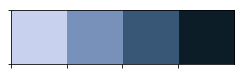

In [193]:
if model == 'HOD':
    #palette = sns.cubehelix_palette(len(fnames), start = 2.6, rot = 0.1, gamma = 0.7)
    palette = sns.cubehelix_palette(len(fnames), start = 2.6, rot = 0.1, gamma = 1.2)

elif model == 'HSAB':
    palette = sns.cubehelix_palette(len(fnames), start = 2.0, rot = 0.1, gamma = 0.7)
    #palette = sns.cubehelix_palette(len(fnames), start = 1.2, rot = 0.6, gamma = 1.7)
elif model == 'CAB':
    palette = sns.cubehelix_palette(len(fnames), start = 0.6, rot = 0.1, gamma = 1.2)
elif model == 'CorrAB':
    #palette = sns.cubehelix_palette(len(fnames), start = 1.2, rot = 0.1, gamma = 1.2)
    palette = sns.cubehelix_palette(len(fnames), start = 1.2, rot = 0.1, gamma = 2.0)
else:
    palette = sns.cubehelix_palette(len(fnames), start = 2.6, rot = 0.1, gamma = 1.2)

sns.palplot(palette)

In [194]:
def color_to_hex(color):
    return np.array(color)#*255

In [195]:
c.configure(colors = [color_to_hex(p) for p in palette], shade = True, shade_alpha=0.2, shade_gradient=1.0)
c.configure(diagonal_tick_labels=True, tick_font_size=8, label_font_size=25, \
            max_ticks=8)#, statistics='cumulative')

In [196]:
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [197]:
hod_idxs = np.array(range(len(cosmo_param_names), len(cosmo_param_names)+len(hod_param_names)-1)) #skip eta
cosmo_idxs = np.array(range(len(cosmo_param_names)))

In [198]:
cosmo_param_names

['$\\Omega_b h^2$',
 '$\\Omega_c h^2$',
 '$w_0$',
 '$n_s$',
 '$H_0$',
 '$N_{eff}$',
 '$\\sigma_8$',
 '$\\Omega_m$',
 '$S_8$']

In [199]:
hod_param_names

['$\\log(M_1)$',
 '$\\log(M_0)$',
 '$\\sigma_{\\log M }$',
 '$\\alpha$',
 '$\\eta$']

In [200]:
if gal_type == 'HOD':
    from pearce.mocks import cat_dict
    cosmo_params = {'simname': sim_info['simname'], 'boxno': sim_info['sim_hps']['boxno'],\
                    'realization': sim_info['sim_hps']['realization'], 'scale_factors':[sim_info['scale_factor']],\
                    'system': 'ki-ls'}
    #cosmo_params = {'simname': 'testbox', 'boxno': 1,\
    #                'realization':1, 'scale_factors':[1.0],\
    #                'system': 'ki-ls'}
    cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!
    
    cpv = cat._get_cosmo_param_names_vals()

    cat_val_dict =  {key: val for key, val in zip(cpv[0], cpv[1])}

    cosmo_true_vals = [cat_val_dict[pn] for pn in chain_pnames if pn in cat_val_dict]
    
    Om = (cat_val_dict['ombh2']+cat_val_dict['omch2'])/((cat_val_dict['H0']/100)**2)
    S8 = cat_val_dict['sigma8']*np.sqrt(Om/0.3)
    cosmo_true_vals.extend([Om, S8])
    
    hod_params = {'alpha': 1.083, 'conc_gal_bias': 1.0, 'logM0': 13.2,'logM1': 14.2, 'sigma_logM': 0.2}#sim_info['hod_params']
    hod_true_vals = [hod_params[key] for key in chain_pnames if key in hod_params]
    
    if model!= 'HOD':
        hod_true_vals.extend([0, 0])
        if model == 'CAB':
            hod_true_vals.extend([0,0])
else: #SHAM, etc on MDPL2
 
    # multidark planck2
    #cosmo_true_vals = np.array([0.0223, 0.1188, -1, 0.9667, 3.047, \
    #                            0.6774*100, 3.046]) #darksky
    
    h = 0.6777
    #cosmo_pnames = ['ombh2', 'omch2', 'w0', 'ns', 'H0', 'Neff', 'sigma8', 'Om', 'S8']
    #cosmo_true_vals = np.array([0.048206*h**2, 0.307115*h**2- 0.048206*h**2,\
    #                            -1, 0.9667, \
    #                            h*100, 3.046, 0.8228, ]) #mdpl2
    cosmo_true_vals = np.array([0.048206*h**2, 0.2589*h**2,\
                                -1, 0.9667, \
                                h*100, 3.046, 0.8228, 0.3089,\
                                0.8228*np.sqrt(0.3089/0.3) ]) #mdpl2
    hod_true_vals = np.array([np.inf for p in hod_param_names])

In [201]:
hod_param_names

['$\\log(M_1)$',
 '$\\log(M_0)$',
 '$\\sigma_{\\log M }$',
 '$\\alpha$',
 '$\\eta$']

In [202]:
# Enforce a consistent order for the plots
#if gal_type == 'HOD':
    
plot_hod_param_names = ['$\\sigma_{\\log M }$', '$\\log(M_0)$', '$\\log(M_1)$', '$\\alpha$', '$\\eta$']
plot_hod_true_vals = [0.2, 13.2, 14.2, 1.083, 1.0]
#plot_hod_true_vals = [0.55, 13.2, 14.5, 0.95, 1.0]

plot_hod_bounds = [(0.05, 0.5), (12.6, 13.6), (13.7, 14.7), (0.7, 1.3), (0.5, 2.0)]

ab_param_names = [r'$\mathcal{A}_{%s}$', r'$\mathcal{B}_{%s}$', r'$\rho_{%s}$']
ab_true_vals = [0.0, np.inf,0.0]
for abpn, hodtv in zip(ab_param_names, ab_true_vals):
    if abpn%'cen' in hod_param_names: # this pname is in the model
        if 'B' in abpn:
            plot_hod_true_vals.extend([np.inf, np.inf])
            plot_hod_param_names.extend([abpn%'cen', abpn%'sat'])

            continue
        for gal_type in ['cen', 'sat']:
            plot_hod_param_names.append(abpn%gal_type)#

            if gal_type == 'cen':
                plot_hod_true_vals.append(np.inf)#0.0)
            else:
                plot_hod_true_vals.append(np.inf)#0.0)

            plot_hod_bounds.append((-1.0, 1.0))

#for phpn in plot_hod_param_names:
#    i = hod_param_names.index(phpn)
#    print phpn, i, hod_true_vals[i]
#    plot_hod_true_vals.append(hod_true_vals[i])
#    plot_hod_bounds.append(hod_bounds[i])


/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


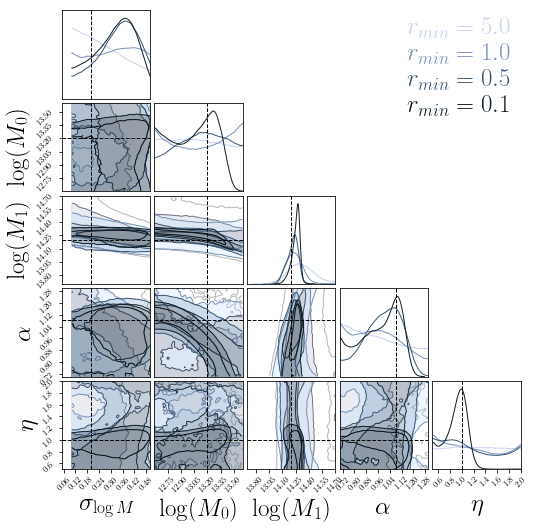

In [203]:
fig = c.plotter.plot(figsize='GROW', parameters = plot_hod_param_names, 
                     truth=plot_hod_true_vals, extents=plot_hod_bounds) 
#plt.suptitle('HSAB')
fig.show()

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


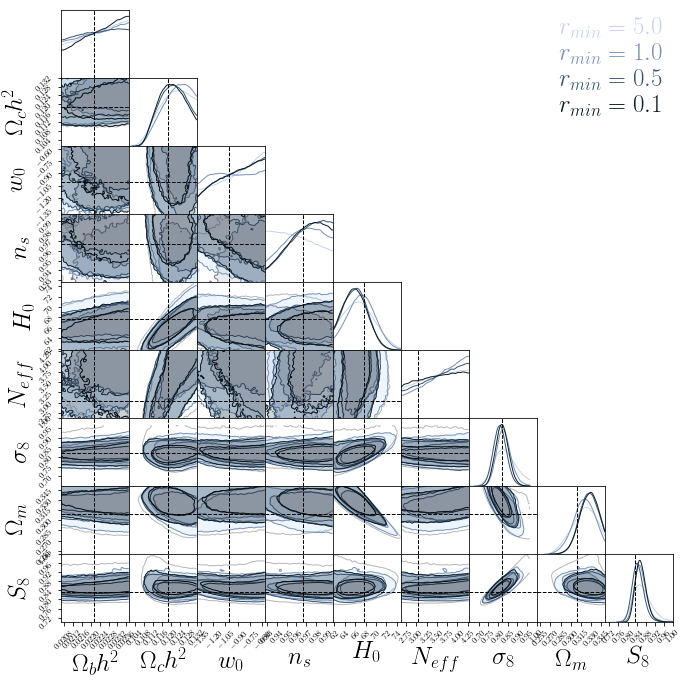

In [204]:
fig = c.plotter.plot(figsize='PAGE', parameters = cosmo_param_names, truth=cosmo_true_vals, extents=cosmo_bounds) 
fig.show()

In [205]:
from copy import deepcopy
true_vals  = list(deepcopy(cosmo_true_vals))
true_vals.extend(plot_hod_true_vals)

In [206]:
true_vals

[0.022139921041739997,
 0.118906890381,
 -1.0,
 0.9667,
 67.77,
 3.046,
 0.8228,
 0.3089,
 0.8349156655535137,
 0.2,
 13.2,
 14.2,
 1.083,
 1.0]

In [207]:
plot_param_names = list(deepcopy(cosmo_param_names))
plot_param_names.extend(plot_hod_param_names)

In [208]:
plot_param_bounds = list(deepcopy(cosmo_bounds))
plot_param_bounds.extend(plot_hod_bounds)

In [209]:
plot_param_names

['$\\Omega_b h^2$',
 '$\\Omega_c h^2$',
 '$w_0$',
 '$n_s$',
 '$H_0$',
 '$N_{eff}$',
 '$\\sigma_8$',
 '$\\Omega_m$',
 '$S_8$',
 '$\\sigma_{\\log M }$',
 '$\\log(M_0)$',
 '$\\log(M_1)$',
 '$\\alpha$',
 '$\\eta$']

In [210]:
# TODO can choose these by galaxy model 
# TODO combine multiple chains? 
#summary_idxs = [1, 4]
#summary_idxs = [7,6,8,4,13]
#summary_idxs = [7,6, 8,4,11, 13]
summary_idxs=[7,8,4]
if len(plot_param_names) > 14:
    #summary_idxs.extend([14,15])#,18,19])
    #summary_idxs.extend([11,12])
    pass


summary_pnames = [plot_param_names[i] for i in summary_idxs]
summary_truths = [true_vals[i] for i in summary_idxs]
summary_bounds = [plot_param_bounds[i] for i in summary_idxs]

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


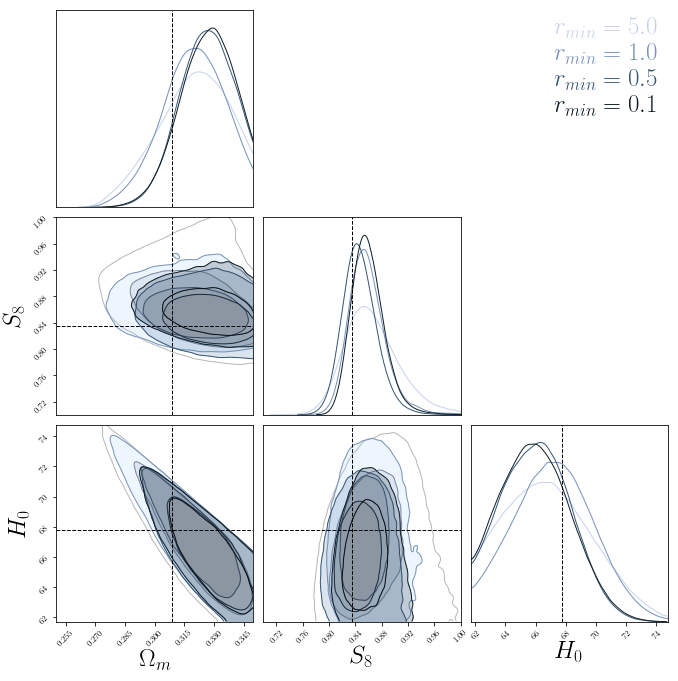

In [211]:
fig = c.plotter.plot(figsize='PAGE', parameters =summary_pnames\
                                    , truth=summary_truths, extents=summary_bounds) 
fig.patch.set_facecolor('white')
fig.show()

In [212]:
for pname in summary_pnames:
    print pname,'\t',
print
print '*'*20

for MAP in MAPs:
    for pname in summary_pnames:
        print MAP[pname],'\t',
    print 
print '*'*20
for st in summary_truths:
    print '%.4f'%st,'\t'*2,

$\Omega_m$ 	$S_8$ 	$H_0$ 	
********************
0.33365408 	0.8800296 	67.98889 	
0.32787588 	0.8630304 	67.45532 	
0.32935482 	0.86429286 	66.57537 	
0.33271646 	0.8746275 	67.06303 	
********************
0.3089 		0.8349 		67.7700 		

In [213]:
MAP = [MAPs[0][pname] for pname in summary_pnames]

In [214]:
c.configure(bar_shade=True)

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


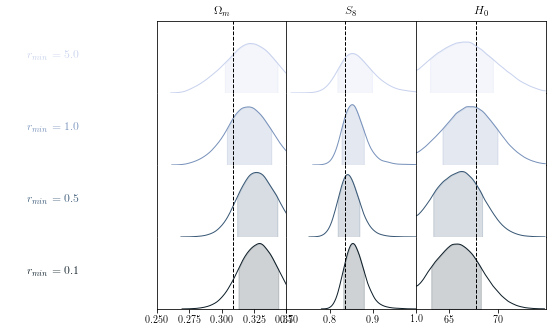

In [215]:
fig = c.plotter.plot_summary(parameters=summary_pnames, truth=summary_truths,\
                             extents=summary_bounds,\
                             figsize=2, errorbar=False) 
#fig.suptitle(model) # + galtype
fig.show()

In [216]:
c.chains[0].name.split()

['$r_{min}', '=', '5.0$']

In [217]:
deltas = []
rmins = []
for chain in c.chains:
    summary = c.analysis.get_parameter_summary(chain, r'$S_8$')
    delta = summary[2]-summary[0]
    deltas.append(delta)
    rmin = chain.name.split()[-1][:-1]
    rmins.append(float(rmin))
    print rmin, delta

5.0 0.08021239874735375
1.0 0.05168602305287795
0.5 0.05029150175637831
0.1 0.047664515916146954


In [218]:
true_s8 = 0.8349

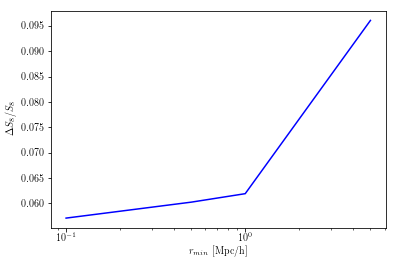

In [219]:
plt.plot(np.array(rmins), np.array(deltas)/true_s8, color = 'b')
plt.xscale('log')
plt.ylabel(r'$\Delta S_8/S_8$')
plt.xlabel(r'$r_{min}$ [Mpc/h]')